# Junção das bases de dados

---

Bases: Matrícula (2016 e 2017), Escolas (2016), INSE (2015), Proximidade de comunidades (? - shapefile MP em Mapas) e tiroteios (2016 - Fogo Cruzado)

- Seleção dos alunos em escolas que possuem INSE e geolocalização
- Criação da variável de evasão
- Adicionando indicadoras de comunidades e tiroteios num raio de 500m e 1km

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bases" data-toc-modified-id="Importando-as-bases-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bases</a></span></li><li><span><a href="#Seleção-de-alunos-e-escolas" data-toc-modified-id="Seleção-de-alunos-e-escolas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Seleção de alunos e escolas</a></span><ul class="toc-item"><li><span><a href="#Verificando-escolas-com-alunos-do-ensino-médio-regular" data-toc-modified-id="Verificando-escolas-com-alunos-do-ensino-médio-regular-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Verificando escolas com alunos do ensino médio regular</a></span></li><li><span><a href="#Criando-variável-de-evasão" data-toc-modified-id="Criando-variável-de-evasão-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Criando variável de evasão</a></span></li><li><span><a href="#Verificando-escolas-que-possuem-INSE-e-geolocalização" data-toc-modified-id="Verificando-escolas-que-possuem-INSE-e-geolocalização-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Verificando escolas que possuem INSE e geolocalização</a></span></li></ul></li><li><span><a href="#Proximidade-da-escola-para-comunidades" data-toc-modified-id="Proximidade-da-escola-para-comunidades-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Proximidade da escola para comunidades</a></span><ul class="toc-item"><li><span><a href="#Áreas-de-comunidades" data-toc-modified-id="Áreas-de-comunidades-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Áreas de comunidades</a></span></li><li><span><a href="#Visualizando-escolas-e-comunidades" data-toc-modified-id="Visualizando-escolas-e-comunidades-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualizando escolas e comunidades</a></span></li><li><span><a href="#Identificando-as-escolas-próximas-de-comunidades" data-toc-modified-id="Identificando-as-escolas-próximas-de-comunidades-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Identificando as escolas próximas de comunidades</a></span></li><li><span><a href="#Tiroteios-no-entorno" data-toc-modified-id="Tiroteios-no-entorno-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tiroteios no entorno</a></span></li><li><span><a href="#Adicionando-na-tabela-de-escolas" data-toc-modified-id="Adicionando-na-tabela-de-escolas-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Adicionando na tabela de escolas</a></span></li></ul></li><li><span><a href="#IDEB" data-toc-modified-id="IDEB-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>IDEB</a></span><ul class="toc-item"><li><span><a href="#Número-de-escolas-e-alunos-selecionados" data-toc-modified-id="Número-de-escolas-e-alunos-selecionados-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Número de escolas e alunos selecionados</a></span></li></ul></li><li><span><a href="#Finalizando-as-tabelas" data-toc-modified-id="Finalizando-as-tabelas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finalizando as tabelas</a></span></li><li><span><a href="#Rascunhos" data-toc-modified-id="Rascunhos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rascunhos</a></span></li></ul></div>

In [169]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH, MODEL_PATH

import os
from copy import deepcopy
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

# Plotting
import plotly
import plotly.graph_objs as go
import cufflinks as cf
plotly.offline.init_notebook_mode(connected=True)

# Metrics
from plot_metrics import plot_roc, plot_confusion

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

colorscale = ['#025951', '#8BD9CA', '#BF7F30', '#F2C124', '#8C470B', '#DFC27D']

In [170]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

import geopandas as gpd

os.listdir(TREAT_PATH / 'censo')

['cleaned_escolas_rj_2017.csv',
 'cleaned_escolas_rj_2016.csv',
 'matriculas_rj_2017duplicado.csv',
 'cleaned_matriculas_rj_2016.csv',
 'cleaned_matriculas_rj_2017.csv',
 'matriculas_rj_2016duplicado.csv',
 'cleaned_alunos_em_rj_2016.csv']

## Importando as bases

In [171]:
inse_rj_2015 = pd.read_csv(TREAT_PATH / 'inse_2015_rj.csv', index_col=0)
# inse_rj_2015.info()

In [172]:
alunos_rj_16 = pd.read_csv(TREAT_PATH / 'censo' / 'cleaned_alunos_em_rj_2016.csv', index_col=0)
# alunos_rj_16.info()

In [173]:
escolas_16 = pd.read_csv(TREAT_PATH / 'censo' / 'cleaned_escolas_rj_2016.csv', index_col=0)
# escolas_16.info()

In [174]:
alunos_rj_17 = pd.read_csv(TREAT_PATH / 'censo' / 'cleaned_matriculas_rj_2017.csv', index_col=0)
# alunos_rj_17.info()

In [175]:
shp_escolas = gpd.GeoDataFrame.from_file(RAW_PATH / 'shp_educ_escolas' / 'educ_escolas.shp')
# shp_escolas.info()

In [176]:
shp_comunidades = gpd.GeoDataFrame.from_file(RAW_PATH / 'shp_hab_comunidades' / 'hab_comunidadesPolygon.shp')
# shp_comunidades.info()

In [177]:
ideb_rj_2015 = pd.read_csv(TREAT_PATH / 'ideb_2015_rj.csv', index_col=0)
# ideb_rj_2015.info()

In [178]:
fogo_rj_2016 = gpd.GeoDataFrame.from_file(TREAT_PATH / 'fogo_2016_rj.shp')
# fogo_rj_2016.info()

## Seleção de alunos e escolas

- 837 de 1097 escolas (76% das escolas)
- 147mil de 183mil (80% dos alunos)
- Mantivemos a proporção de alunos evadidos (66 para 68%)

### Verificando escolas com alunos do ensino médio regular


- Alunos do 1º ano regular no RJ na rede estadual em 2016: 183.146 alunos em 1097 escolas

In [179]:
escolas = alunos_rj_16['CO_ENTIDADE'].unique()
escolas_17 = escolas_16[escolas_16['CO_ENTIDADE'].isin(escolas)]

print('# de escolas com infos de alunos:', len(escolas))
print('# de escolas com info do Censo:', len(escolas_16[escolas_16['CO_ENTIDADE'].isin(escolas)]))

# de escolas com infos de alunos: 1097
# de escolas com info do Censo: 1097


In [180]:
alunos = len(alunos_rj_16)
df_alunos = alunos_rj_16.copy()

In [181]:
df_escolas = escolas_16[escolas_16['CO_ENTIDADE'].isin(df_alunos['CO_ENTIDADE'])]
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 6560 to 275339
Columns: 166 entries, NU_ANO_CENSO to IN_ESP_EXCLUSIVA_PROF
dtypes: float64(151), int64(11), object(4)
memory usage: 1.4+ MB


### Criando variável de evasão

In [182]:
alunos_permanente = df_alunos[df_alunos['ID'].isin(alunos_rj_17['ID'])]['ID']

df_alunos['IN_EVASAO'] = np.where(df_alunos['ID'].isin(alunos_permanente), 0, 1)
evasao_17 = df_alunos['IN_EVASAO'].value_counts(normalize=True).apply(lambda x: round(100*x, 2))
evasao_17

0    66.15
1    33.85
Name: IN_EVASAO, dtype: float64

- Salvando as mudanças para o texto:

In [183]:
filtro = pd.DataFrame(columns=['Filtro', 'Número de alunas(os) - 2016', 'Número de escolas', 'Evadidas(os) (%)'])

filtro.loc[0] = ['Escolas com Censo 2016 e 2017', alunos, len(escolas), evasao_17[1]]
filtro

,Filtro,Número de alunas(os) - 2016,Número de escolas,Evadidas(os) (%)
0,Escolas com Censo 2016 e 2017,182838,1097,33.85


### Verificando escolas que possuem INSE e geolocalização

- INSE

In [184]:
inse_rj_2015 = inse_rj_2015.rename({'CO_ESCOLA': 'CO_ENTIDADE', 'NIVEL': 'INSE_NIVEL'}, axis=1)
inse_rj_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 33485 to 37804
Data columns (total 13 columns):
CO_ENTIDADE            936 non-null int64
NOME_ESCOLA            936 non-null object
CO_UF                  936 non-null int64
NOME_UF                936 non-null object
CO_MUNICIPIO           936 non-null int64
NOME_MUNICIPIO         936 non-null int64
ID_AREA                936 non-null int64
TP_DEPENDENCIA         936 non-null int64
TP_LOCALIZACAO         936 non-null int64
QTD_ALUNOS_INSE        936 non-null int64
INSE_VALOR_ABSOLUTO    936 non-null float64
INSE_CLASSIFICACAO     936 non-null object
INSE_NIVEL             936 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 102.4+ KB


In [185]:
inse_rj_2015.head(3)

,CO_ENTIDADE,NOME_ESCOLA,CO_UF,NOME_UF,CO_MUNICIPIO,NOME_MUNICIPIO,ID_AREA,TP_DEPENDENCIA,TP_LOCALIZACAO,QTD_ALUNOS_INSE,INSE_VALOR_ABSOLUTO,INSE_CLASSIFICACAO,INSE_NIVEL
33485,33000026,CE GOVERNADOR ROBERTO SILVEIRA,33,Rio de Janeiro,3300605,3300605,0,2,1,41,49.53,Grupo 3,3
33486,33000042,CE PADRE MELLO,33,Rio de Janeiro,3300605,3300605,0,2,1,129,46.42,Grupo 3,3
33488,33000158,CE EUCLIDES FELICIANO TARDIN,33,Rio de Janeiro,3300605,3300605,0,2,1,205,49.97,Grupo 3,3


In [186]:
inse_rj_2015 = inse_rj_2015[['CO_ENTIDADE', 'INSE_VALOR_ABSOLUTO', 'INSE_NIVEL']]

df_escolas = df_escolas.merge(inse_rj_2015, on='CO_ENTIDADE', how='left')
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Columns: 168 entries, NU_ANO_CENSO to INSE_NIVEL
dtypes: float64(153), int64(11), object(4)
memory usage: 1.4+ MB


In [187]:
df_escolas[['INSE_NIVEL']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 1 columns):
INSE_NIVEL    849 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


In [188]:
escolas_inse = df_escolas[df_escolas['INSE_NIVEL'].isnull() == False]['CO_ENTIDADE']
len(escolas_inse)

849

- Geolocalização

In [189]:
from unidecode import unidecode as unidc
from string import punctuation as punc

# Formatando colunas
shp_escolas.columns = [unidc(i.upper().strip(punc)) if i != 'geometry' else i for i in shp_escolas.columns]
shp_escolas = shp_escolas.rename({'CODIGO_ESC': 'CO_ENTIDADE'}, axis=1)
shp_escolas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10191 entries, 0 to 10190
Data columns (total 23 columns):
CO_ENTIDADE    10191 non-null int64
ESCOLA         10191 non-null object
REDE           10191 non-null object
GESTAO         10191 non-null object
SITUACAO       10191 non-null object
MUNICIPIO      10191 non-null object
DISTRITO       10191 non-null object
ENDERECO       10191 non-null object
IDEB_2005      10191 non-null object
IDEB_2007      10191 non-null object
IDEB_2009      10191 non-null object
IDEB_2011      10191 non-null object
IDEB_2013      10191 non-null object
IDEB_2015      10191 non-null object
IDEB_20050     10191 non-null object
IDEB_20070     10191 non-null object
IDEB_20090     10191 non-null object
IDEB_20110     10191 non-null object
IDEB_20130     10191 non-null object
IDEB_20150     10191 non-null object
DUPLA_REGR     10191 non-null object
TIPO_UNIDA     10191 non-null object
geometry       10191 non-null object
dtypes: int64(1), object(22)
memo

In [190]:
shp_escolas.head(3)

,CO_ENTIDADE,ESCOLA,REDE,GESTAO,SITUACAO,MUNICIPIO,DISTRITO,ENDERECO,IDEB_2005,IDEB_2007,IDEB_2009,IDEB_2011,IDEB_2013,IDEB_2015,IDEB_20050,IDEB_20070,IDEB_20090,IDEB_20110,IDEB_20130,IDEB_20150,DUPLA_REGR,TIPO_UNIDA,geometry
0,33000026,CE GOVERNADOR ROBERTO SILVEIRA,Pública,Estadual,Em Atividade,Bom Jesus do Itabapoana,Bom Jesus do Itabapoana,RUA GONCALVES DA SILVA 75 CENTRO - Bom Jesus d...,3.79999995,3.9000001,4.5,4.30000019,não informado,não informado,3.5999999,2.9000001,3.20000005,3.70000005,4.0999999,2.79999995,NÃO,não informada,(POINT (-41.68119899999999 -21.135829))
1,33000042,CE PADRE MELLO,Pública,Estadual,Em Atividade,Bom Jesus do Itabapoana,Bom Jesus do Itabapoana,AVENIDA GOVERNADOR ROBERTO SILVEIRA 578 CENTRO...,não informado,não informado,não informado,não informado,não informado,não informado,4,3.20000005,4.0999999,4.0999999,4.5,5.80000019,NÃO,não informada,(POINT (-41.671929 -21.135799))
2,33000077,IFF - CAMPUS BOM JESUS DO ITABAPOANA,Pública,Federal,Em Atividade,Bom Jesus do Itabapoana,Bom Jesus do Itabapoana,AVENIDA DARIO VIEIRA BORGES 235 LIA MARCIA - B...,não informado,não informado,não informado,não informado,não informado,não informado,não informado,não informado,não informado,não informado,não informado,não informado,não calculada,não informada,(POINT (-41.659904 -21.13615300000001))


In [191]:
shp_escolas = shp_escolas[['CO_ENTIDADE', 'geometry']]

df_escolas = df_escolas.merge(shp_escolas, on='CO_ENTIDADE', how='left')
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Columns: 169 entries, NU_ANO_CENSO to geometry
dtypes: float64(153), int64(11), object(5)
memory usage: 1.4+ MB


* Verificando escolas com ambos

In [192]:
df_escolas[['INSE_NIVEL', 'geometry']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 2 columns):
INSE_NIVEL    849 non-null float64
geometry      1080 non-null object
dtypes: float64(1), object(1)
memory usage: 25.7+ KB


In [193]:
add_cols = ['INSE_NIVEL', 'geometry']

escolas_shp = df_escolas.dropna(subset=add_cols)['CO_ENTIDADE'].unique()
len(escolas_shp)

837

In [194]:
# escolas_final = shp_escolas['CO_ENTIDADE'].unique()
# print('# de escolas com info do INSE e geoloc.:', len(escolas_final))
# print('% de escolas com info do INSE e geoloc.:', 100*len(escolas_final)/len(escolas))

## Proximidade da escola para comunidades

In [195]:
shp_escolas = shp_escolas[shp_escolas['CO_ENTIDADE'].isin(escolas_shp)].reset_index(drop=True)
shp_escolas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 2 columns):
CO_ENTIDADE    837 non-null int64
geometry       837 non-null object
dtypes: int64(1), object(1)
memory usage: 13.2+ KB


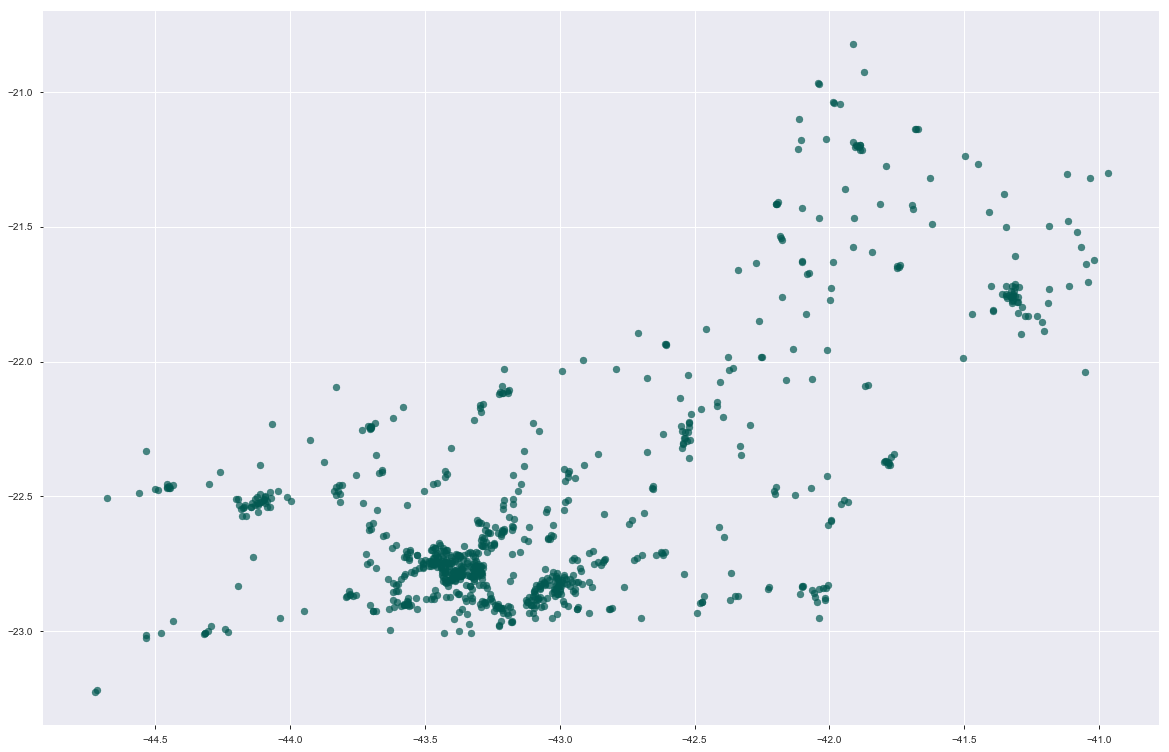

In [196]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

# Todas as escolas selecionadas
shp_escolas.plot(color=colorscale[0], alpha=.7)

### Áreas de comunidades

- Ao todo, são 80 comunidades e complexos (mais de uma região delimitada) geolocalizadas do RJ

In [197]:
# Formatando colunas
shp_comunidades.columns = [i.upper() if i != 'geometry' else i for i in shp_comunidades.columns]
shp_comunidades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 8 columns):
ID            3076 non-null float64
FONTE         3076 non-null object
CODIGO_MUN    3076 non-null int64
MUNICÍPIO     3076 non-null object
CÓDIGO_COM    3076 non-null float64
COMUNIDADE    3076 non-null object
REFERÊNCIA    2713 non-null object
geometry      3076 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 192.3+ KB


In [198]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 20, 20
# shp_comunidades.plot(color=colorscale[-1])

### Visualizando escolas e comunidades

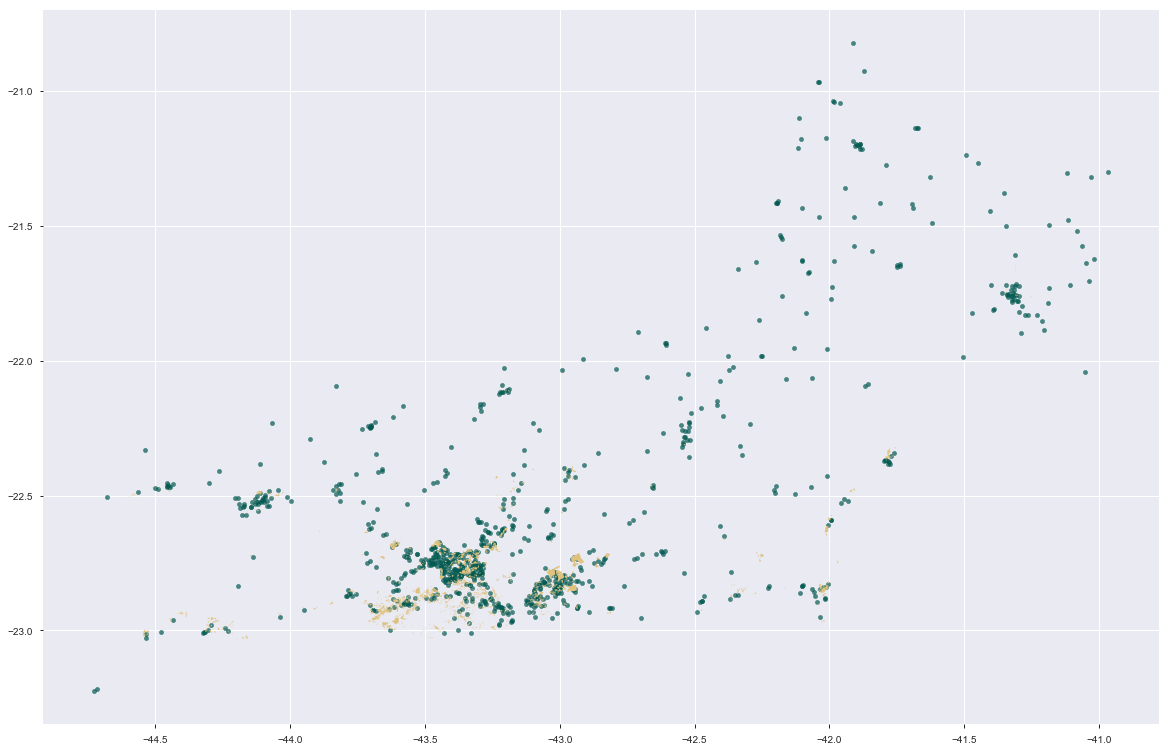

In [199]:
rcParams['figure.figsize'] = 20, 20

ax = shp_escolas.plot(markersize=20, color=colorscale[0], label='Escolas', alpha=.7, legend=True)
shp_comunidades.plot(ax=ax, color=colorscale[-1], label='Comunidades', legend=True)

### Identificando as escolas próximas de comunidades

- Verificamos a existência de uma comunidade ao redor da escola num raio de 500m (mais próximo da escola) e 1km (supondo área de efeito direto na escola / residência do aluno) 

In [200]:
# shp_escolas['geometry'].apply(lambda p: p.buffer(0.005))

In [245]:
shp_escolas['RAIO_5KM'] = shp_escolas['geometry'].apply(lambda p: p.buffer(0.045))
shp_escolas['RAIO_1KM'] = shp_escolas['geometry'].apply(lambda p: p.buffer(0.009))

In [246]:
p1 = [i.strip('(),') for i in str(shp_escolas.loc[0]['geometry']).split()[1:3]]
p2 = [i.strip('(),') for i in str(shp_escolas.loc[0]['RAIO_1KM']).split()[1:3]]

In [247]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1, lon1 = radians(float(p1[0])), radians(float(p1[1]))
lat2, lon2 = radians(float(p2[0])), radians(float(p2[1]))


dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

dist_comum = R * c
dist_comum

1.0010684990666083

In [252]:
def intersect_comunidade(row, df=shp_comunidades):
    
    # Comunidades no raio de 1km
    int1 = df[df['geometry'].apply(lambda x: row['RAIO_1KM'].intersects(x))]
    
    if len(int1) > 0:
        return (1, 1)
    
    # Comunidades no raio de 5KM
    int5 = df[df['geometry'].apply(lambda x: row['RAIO_5KM'].intersects(x))]
    
    if len(int5) > 0:
        return (0, 1)

    # Sem comunidade no entorno
    return (0, 0)

In [253]:
from tqdm import tqdm
tqdm.pandas()

shp_escolas['IN_COMUNIDADE_5KM'], shp_escolas['IN_COMUNIDADE_1KM'] = zip(*shp_escolas.progress_apply(intersect_comunidade, axis=1))

100%|██████████| 837/837 [01:34<00:00,  8.85it/s]


In [254]:
shp_escolas['IN_COMUNIDADE_5KM'].value_counts()

1    480
0    357
Name: IN_COMUNIDADE_5KM, dtype: int64

In [255]:
shp_escolas['IN_COMUNIDADE_1KM'].value_counts()

1    642
0    195
Name: IN_COMUNIDADE_1KM, dtype: int64

### Tiroteios no entorno

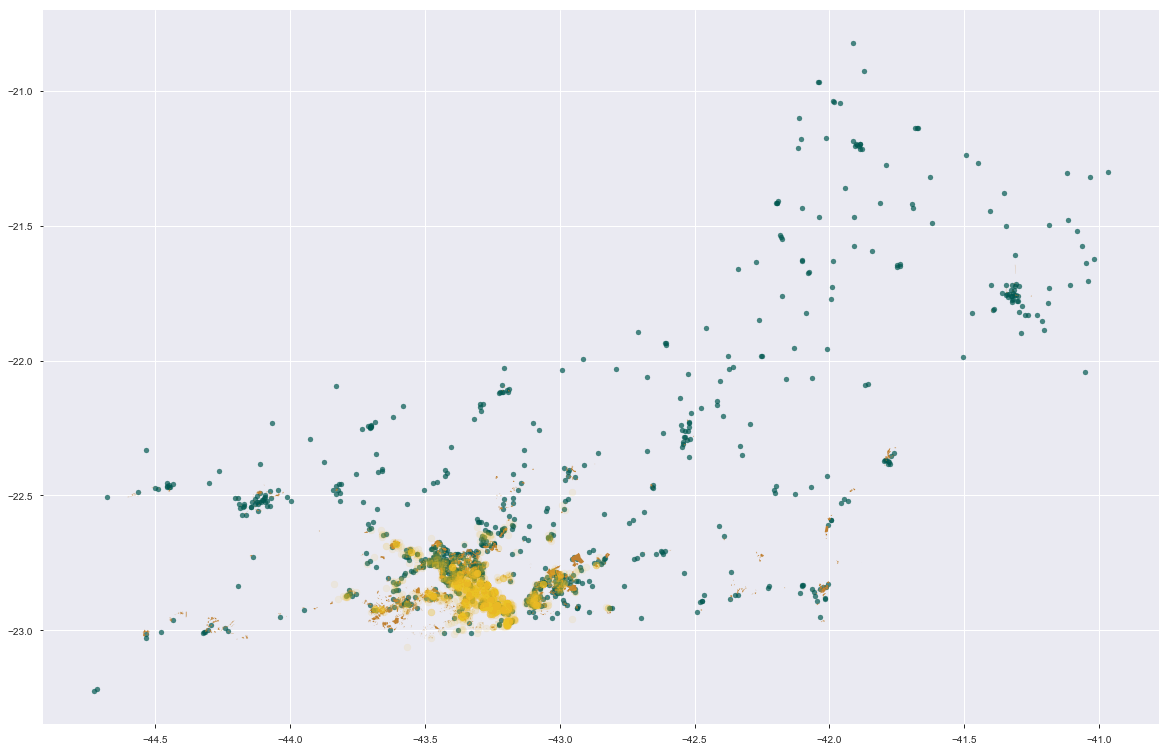

In [208]:
rcParams['figure.figsize'] = 20, 20

ax = shp_escolas.plot(markersize=25, color=colorscale[0], label='Escolas', alpha=.7, legend=True)
shp_comunidades.plot(ax=ax, color=colorscale[2], label='Comunidades', legend=True)
fogo_rj_2016.plot(ax=ax, color=colorscale[3], label='Tiroteios', alpha=.1, legend=True)

In [256]:
def intersect_tiroteios(row, df=fogo_rj_2016):
    
    # Tiroteios no raio de 1km
    int1 = df[df['geometry'].apply(lambda x: row['RAIO_1KM'].intersects(x))]
    
    if len(int1) > 0:
        return (1, 1)
    
    # Tiroteios no raio de 5km
    int5 = df[df['geometry'].apply(lambda x: row['RAIO_5KM'].intersects(x))]
    
    if len(int5) > 0:
        return (0, 1)

    # Sem tiroteios no entorno
    return (0, 0)

In [257]:
from tqdm import tqdm
tqdm.pandas()

shp_escolas['IN_TIROTEIO_5KM'], shp_escolas['IN_TIROTEIO_1KM'] = zip(*shp_escolas.progress_apply(intersect_tiroteios, axis=1))

100%|██████████| 837/837 [01:19<00:00, 10.52it/s]


### Adicionando na tabela de escolas

In [266]:
cols = ['CO_ENTIDADE', 'IN_COMUNIDADE_1KM', 'IN_COMUNIDADE_5KM', 'IN_TIROTEIO_1KM', 'IN_TIROTEIO_5KM']
df_escolas = df_escolas.merge(shp_escolas[cols], on='CO_ENTIDADE', how='left')
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 836
Columns: 175 entries, NU_ANO_CENSO to IN_TIROTEIO_5KM
dtypes: float64(154), int64(16), object(5)
memory usage: 1.1+ MB


In [268]:
df_escolas['IN_COMUNIDADE_1KM'].value_counts(normalize=True)

1    0.767025
0    0.232975
Name: IN_COMUNIDADE_1KM, dtype: float64

In [269]:
df_escolas['IN_COMUNIDADE_5KM'].value_counts(normalize=True)

1    0.573477
0    0.426523
Name: IN_COMUNIDADE_5KM, dtype: float64

In [270]:
df_escolas['IN_TIROTEIO_1KM'].value_counts(normalize=True)

1    0.544803
0    0.455197
Name: IN_TIROTEIO_1KM, dtype: float64

In [271]:
df_escolas['IN_TIROTEIO_5KM'].value_counts(normalize=True)

0    0.608124
1    0.391876
Name: IN_TIROTEIO_5KM, dtype: float64

## IDEB

In [217]:
# ideb_rj_2015.head(3)

In [218]:
# ideb_rj_2015['COD_MUNICIPIO'].value_counts()

In [219]:
# ideb_rj_2015 = ideb_rj_2015.rename({'COD_INEP': 'CO_ENTIDADE'}, axis=1)

In [220]:
# escolas_shp = pd.Series(escolas_shp)
# escolas_ideb = escolas_shp[escolas_shp.isin(ideb_rj_2015['CO_ENTIDADE'])]
# len(escolas_ideb)

In [221]:
# ideb_rj_escolas = ideb_rj_2015[ideb_rj_2015['CO_ENTIDADE'].isin(escolas_ideb)]
# ideb_rj_escolas.info()

In [222]:
# ideb_rj_escolas['TAXA_APROVACAO_2015_9'] = ideb_rj_escolas['TAXA_APROVACAO_2015_9'].replace({'-': np.nan})
# ideb_rj_escolas['IDEB_2015'] = ideb_rj_escolas['IDEB_2015'].replace({'-': np.nan})
# ideb_rj_escolas[['TAXA_APROVACAO_2015_9', 'IDEB_2015']].info()

In [223]:
# escolas_ideb = ideb_rj_escolas[ideb_rj_escolas['IDEB_2015'].isnull() == False]['CO_ENTIDADE']
# len(escolas_ideb)

In [224]:
# add_ideb = ['TAXA_APROVACAO_2015_9', 'IDEB_2015']

In [225]:
# cols = ['CO_ENTIDADE', 'TAXA_APROVACAO_2015_9', 'IDEB_2015']
# df_escolas = df_escolas.merge(ideb_rj_escolas[cols], on='CO_ENTIDADE', how='left')
# df_escolas.info()

### Número de escolas e alunos selecionados

In [226]:
filtro

,Filtro,Número de alunas(os) - 2016,Número de escolas,Evadidas(os) (%)
0,Escolas com Censo 2016 e 2017,182838,1097,33.85


In [227]:
len(df_alunos), len(escolas)

(182838, 1097)

In [228]:
def add_filtro(escolas, title):
    
    alunos_df = df_alunos[df_alunos['CO_ENTIDADE'].isin(escolas)]
    evasao_df = alunos_df['IN_EVASAO'].value_counts(normalize=True).apply(lambda x: round(100*x, 2))
    
    n = len(filtro)
    filtro.loc[n] = [title, len(alunos_df), len(escolas), evasao_df[1]]
    
    return filtro

In [229]:
add_filtro(escolas_inse, 'Escolas com INSE')

,Filtro,Número de alunas(os) - 2016,Número de escolas,Evadidas(os) (%)
0,Escolas com Censo 2016 e 2017,182838,1097,33.85
1,Escolas com INSE,149234,849,31.88


In [230]:
add_filtro(escolas_shp, 'Escolas com geolocalização')

,Filtro,Número de alunas(os) - 2016,Número de escolas,Evadidas(os) (%)
0,Escolas com Censo 2016 e 2017,182838,1097,33.85
1,Escolas com INSE,149234,849,31.88
2,Escolas com geolocalização,147267,837,31.95


In [231]:
# add_filtro(escolas_ideb, 'Escolas com IDEB')

In [232]:
print(filtro.to_latex())

\begin{tabular}{llllr}
\toprule
{} &                         Filtro & Número de alunas(os) - 2016 & Número de escolas &  Evadidas(os) (\%) \\
\midrule
0 &  Escolas com Censo 2016 e 2017 &                      182838 &              1097 &             33.85 \\
1 &               Escolas com INSE &                      149234 &               849 &             31.88 \\
2 &     Escolas com geolocalização &                      147267 &               837 &             31.95 \\
\bottomrule
\end{tabular}



## Finalizando as tabelas

In [233]:
df_escolas = df_escolas[(df_escolas['CO_ENTIDADE'].isin(escolas_shp)) & 
                       (df_escolas['CO_ENTIDADE'].isin(escolas_inse))]
                       #& (df_escolas['CO_ENTIDADE'].isin(escolas_ideb))]
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 1 to 1096
Columns: 173 entries, NU_ANO_CENSO to IN_TIROTEIO_5KM
dtypes: float64(157), int64(11), object(5)
memory usage: 1.1+ MB


In [234]:
df_alunos = df_alunos[df_alunos['CO_ENTIDADE'].isin(df_escolas['CO_ENTIDADE'])]
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147267 entries, 118 to 553388
Data columns (total 92 columns):
NU_ANO_CENSO                     147267 non-null int64
NU_DIA                           147267 non-null int64
NU_MES                           147267 non-null int64
NU_ANO                           147267 non-null int64
NU_IDADE_REFERENCIA              147267 non-null int64
NU_IDADE                         147267 non-null int64
NU_DURACAO_TURMA                 147267 non-null int64
NU_DUR_ATIV_COMP_MESMA_REDE      147267 non-null int64
NU_DUR_ATIV_COMP_OUTRAS_REDES    147267 non-null int64
NU_DUR_AEE_MESMA_REDE            147267 non-null int64
NU_DUR_AEE_OUTRAS_REDES          147267 non-null int64
NU_DIAS_ATIVIDADE                147267 non-null int64
TP_SEXO                          147267 non-null int64
TP_COR_RACA                      147267 non-null int64
TP_NACIONALIDADE                 147267 non-null int64
CO_PAIS_ORIGEM                   147267 non-null int64
CO_UF_N

In [235]:
df_alunos['CO_MUNICIPIO'].value_counts()

3304557    42428
3301702    11584
3303500     9261
3304904     8545
3305109     6452
3300456     4933
3301009     4659
3303302     4447
3302502     3365
3303906     2958
3301900     2712
3303203     2631
3306305     2581
3302403     2404
3300100     2062
3305802     2047
3300407     1865
3302858     1694
3304144     1650
3303401     1591
3300704     1560
3304201     1543
3304524     1397
3302700     1382
3302007     1224
3302205     1014
3305208     1012
3305505      830
3300803      828
3300308      813
           ...  
3305406      227
3301801      221
3304409      213
3301504      201
3303104      191
3301207      184
3304102      174
3303955      159
3301108      154
3301603      151
3302056      121
3304128      115
3306156      111
3300902      111
3300225      107
3304003      106
3304607      104
3302304       95
3304508       93
3305703       91
3301157       89
3300159       87
3302452       86
3305307       81
3300951       78
3305901       65
3302809       59
3305133       

In [236]:
df_escolas.to_csv(TREAT_PATH / 'analysis' / 'df_escolas16.csv')

In [237]:
df_alunos.to_csv(TREAT_PATH / 'analysis' / 'df_alunos16.csv')

## Rascunhos